In [36]:
import numpy as np
import pandas as pd

In [37]:
#0.load data
dt=pd.read_csv("D:\Data\python\data0.csv") 

#show the top 5 rows of data
dt.head() 

,id,grp1,grp2,cov1,cov2,cov3,cov4,f1,f2,f3,f4,out1,out2,out3,out4,out4t
0,1,0,2,10.588393,5.765045,0,2,8.883864,0.791934,1,1,5.031413,0,1,1,201
1,2,1,0,10.095498,5.273806,0,1,8.497210,0.881411,1,0,5.737039,0,2,1,125
2,3,0,2,10.221286,5.135972,1,2,8.175174,0.177713,0,2,5.387061,1,2,0,152
3,4,1,3,10.884562,5.459708,0,0,8.421732,0.052869,1,3,5.031891,0,2,1,148
4,5,0,2,10.707055,5.306728,0,1,8.714487,0.128239,1,1,5.337904,1,1,0,127


In [38]:
#1. differnce analysis 
#varibles grouped for t-test
#get variables of cov1 grouped by grp1 = 0
g0=dt[dt["grp1"]==0]["cov1"]

#get variables of cov1 grouped by grp1 = 1
g1=dt[dt["grp1"]==1]["cov1"] 

In [39]:
#1.1 t-test for cov1 grouped by grp1
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
stats.ttest_ind(g0,g1) 

Ttest_indResult(statistic=1.3763098115892567, pvalue=0.17028024523077878)

In [40]:
#1.2 anova
#formula for out1 grouped by grp2
formula='out1 ~ C(%s)'%("grp2") 

#anova according to formula
out1_anova=sm.stats.anova_lm(ols(formula,dt).fit()) 
print(out1_anova)

             df     sum_sq   mean_sq        F   PR(>F)
C(grp2)     3.0   0.016869  0.005623  0.06456  0.97854
Residual  196.0  17.070892  0.087096      NaN      NaN


d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [41]:
#multiple testing for anova
out1_anova_post=pairwise_tukeyhsd(dt["out1"],dt["grp2"],alpha=0.05)
out1_anova_post.summary()

group1,group2,meandiff,lower,upper,reject
0,1,0.0073,-0.1389,0.1535,False
0,2,0.0215,-0.129,0.1719,False
0,3,0.0205,-0.1318,0.1729,False
1,2,0.0142,-0.1413,0.1697,False
1,3,0.0133,-0.1441,0.1706,False
2,3,-0.0009,-0.1622,0.1603,False


In [42]:
#1.3 chi-square test
#crosstable
sc_cg=pd.crosstab(dt["grp1"],dt["out3"],margins=True)
sc_cg

out3,0,1,2,3,All
grp1,,,,,
0,36,26,20,23,105
1,23,23,28,21,95
All,59,49,48,44,200


In [43]:
#chi-square analysis
chi_res=stats.chi2_contingency(sc_cg)
chi_res

(3.9822783692142303,
 0.85871881608965372,
 8,
 array([[  30.975,   25.725,   25.2  ,   23.1  ,  105.   ],
        [  28.025,   23.275,   22.8  ,   20.9  ,   95.   ],
        [  59.   ,   49.   ,   48.   ,   44.   ,  200.   ]]))

In [44]:
#fisher exact analysis
stats.fisher_exact(sc_cg.ix[:2,:2])

(1.3846153846153846, 0.43917943645553253)

In [45]:
#2. correlation analysis
#2.1 correlation
dt.corr()

,id,grp1,grp2,cov1,cov2,cov3,cov4,f1,f2,f3,f4,out1,out2,out3,out4,out4t
id,1.000000,-0.036853,-1.742556e-01,-0.099446,-0.058614,-0.011004,0.070085,0.038011,0.106700,-0.059153,8.826619e-02,0.019814,-0.015919,-0.029970,0.044363,0.027580
grp1,-0.036853,1.000000,-4.118294e-02,-0.097346,-0.035178,0.018532,0.015094,-0.015185,0.046296,0.079604,8.993385e-02,-0.030385,0.124379,0.092741,0.016561,-0.048579
grp2,-0.174256,-0.041183,1.000000e+00,0.020381,0.164419,0.005561,-0.052288,0.003275,0.019286,-0.081155,-2.352877e-17,0.029616,-0.038172,0.036051,-0.034546,-0.021151
cov1,-0.099446,-0.097346,2.038122e-02,1.000000,0.031615,-0.004823,-0.041203,-0.044390,-0.026743,-0.101859,-3.879594e-02,-0.135347,-0.011089,0.037811,-0.019155,0.035337
cov2,-0.058614,-0.035178,1.644191e-01,0.031615,1.000000,0.076249,-0.049136,0.119194,-0.041981,-0.117818,5.350349e-02,-0.007904,-0.154812,0.047706,-0.010960,-0.033966
cov3,-0.011004,0.018532,5.560804e-03,-0.004823,0.076249,1.000000,-0.155047,-0.155736,-0.122444,0.039720,1.474467e-01,-0.026585,0.106900,0.085822,-0.022164,0.004664
cov4,0.070085,0.015094,-5.228779e-02,-0.041203,-0.049136,-0.155047,1.000000,0.040569,-0.014703,-0.023519,-1.138556e-01,-0.041901,0.057248,-0.090278,0.040502,0.046837
f1,0.038011,-0.015185,3.275317e-03,-0.044390,0.119194,-0.155736,0.040569,1.000000,-0.054466,0.003816,-3.315960e-03,0.044930,-0.159100,-0.091829,0.068817,0.057033
f2,0.106700,0.046296,1.928609e-02,-0.026743,-0.041981,-0.122444,-0.014703,-0.054466,1.000000,0.049364,-7.725101e-02,-0.096655,-0.098601,0.017160,0.004815,0.023511
f3,-0.059153,0.079604,-8.115525e-02,-0.101859,-0.117818,0.039720,-0.023519,0.003816,0.049364,1.000000,6.746105e-02,0.086355,-0.051914,0.087831,0.019348,-0.030839


In [46]:
#2.2 person correlation coefficient
stats.pearsonr(dt["cov1"],dt["out1"])

(-0.1353472768187241, 0.056016894276046857)

In [47]:
stats.pearsonr(dt[dt.columns[1]],dt[dt.columns[2]])

(-0.041182938833114843, 0.56258254364123195)

In [48]:
# full matirx for person correlation
pcor=[]
for i in dt.columns:
    for j in dt.columns:
        pcor.append(stats.pearsonr(dt[i],dt[j]))
pcor

[(1.0, 0.0),
 (-0.036852634365583822, 0.60439949210676969),
 (-0.17425558173506772, 0.013594253218964675),
 (-0.099446268711857105, 0.16120128668578396),
 (-0.058614041995401801, 0.40968897869164667),
 (-0.01100361285257416, 0.87710208539667367),
 (0.070084540349993743, 0.32406161324054339),
 (0.038011174541681882, 0.59307663362400675),
 (0.10669951382087446, 0.1326336543568456),
 (-0.059153232197084196, 0.40538728974449456),
 (0.088266191599423269, 0.21391370160054293),
 (0.019813840324562154, 0.78064315583765498),
 (-0.015918633983483484, 0.82297006768788061),
 (-0.029970485654511797, 0.67354724285530776),
 (0.044363274813263104, 0.53278118284409381),
 (0.027580044260673786, 0.69826048476659275),
 (-0.036852634365583822, 0.60439949210676969),
 (1.0, 0.0),
 (-0.041182938833114843, 0.56258254364123195),
 (-0.097345544395609246, 0.17028024523078572),
 (-0.035178314366542708, 0.62093102731500871),
 (0.018531509506343143, 0.79451298412235916),
 (0.01509444709505752, 0.83199642669676965),


In [49]:
#2.3 spearman correlation coefficient
rho,p=stats.spearmanr(dt)
print(rho,p)

[[  1.00000000e+00  -3.68526344e-02  -1.75339371e-01  -9.03217580e-02
   -6.55201380e-02  -1.10036129e-02   7.07850085e-02   4.13770344e-02
    1.04201605e-01  -5.91532322e-02   8.87451798e-02   2.33525838e-02
   -1.59186340e-02  -3.70315814e-02   4.43632748e-02   3.21723462e-02]
 [ -3.68526344e-02   1.00000000e+00  -4.19691520e-02  -9.96321809e-02
   -2.99156679e-02   1.85315095e-02   1.34436480e-02  -1.36137967e-02
    5.24608089e-02   7.96035420e-02   8.63386229e-02  -2.69674571e-02
    1.24378985e-01   9.55852458e-02   1.65612887e-02  -4.87383127e-02]
 [ -1.75339371e-01  -4.19691520e-02   1.00000000e+00   2.92101714e-02
    1.59946205e-01   8.69176645e-03  -4.87547797e-02  -1.63433616e-03
    1.96958063e-02  -7.96277181e-02   1.96052755e-03   3.08297698e-02
   -3.98008016e-02   4.18963195e-02  -3.70815161e-02  -1.79062588e-02]
 [ -9.03217580e-02  -9.96321809e-02   2.92101714e-02   1.00000000e+00
    3.26468162e-02  -4.59205891e-03  -3.49926879e-02  -3.91149779e-02
   -1.71424286e-0

In [50]:
#3.Regression analysis

In [51]:
import matplotlib.pyplot as plt

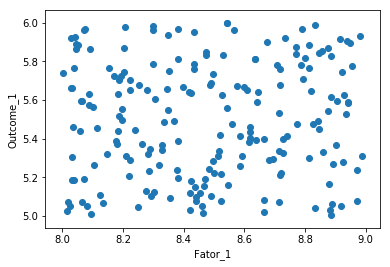

In [82]:
#scatter plot
plt.scatter(dt["f1"],dt["out1"])
plt.xlabel("Fator_1")
plt.ylabel("Outcome_1")
plt.show()

In [110]:
#3.1 Linear Regression analysis
#3.1.1 Univariate linear regression analysis
formula="%s~%s"%("out1","f1") #Y - X
out_model1=ols(formula,data=dt).fit()
out_model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.003  
Dependent Variable: out1             AIC:                79.1803 
Date:               2018-05-14 16:48 BIC:                85.7769 
No. Observations:   200              Log-Likelihood:     -37.590 
Df Model:           1                F-statistic:        0.4005  
Df Residuals:       198              Prob (F-statistic): 0.528   
R-squared:          0.002            Scale:              0.086128
-------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
Intercept    5.1160     0.6063   8.4382   0.0000    3.9204   6.3116
f1           0.0452     0.0715   0.6329   0.5276   -0.0957   0.1862
-----------------------------------------------------------------
Omnibus:             105.024       Durbin-Watson:          2.249 
Prob(Omnibus):       0.000         Jarque-Bera (JB):       12.456
Skew:                -0.013        Prob(JB):               0.002 
Kurtosis:            1.778         Condition No.:          251   
=================================================================

"""

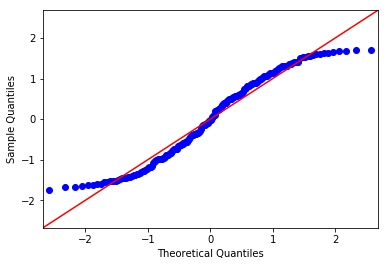

In [59]:
sm.qqplot(out_model1.resid,fit=True,line='45')

In [56]:
#3.1.2 Multiple vaiables linear regression analysis
formula="%s~%s+%s+%s"%("out1","cov1","cov2","f1")

In [60]:
out_model2=ols(formula,data=dt).fit()
out_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.003  
Dependent Variable: out1             AIC:                79.1803 
Date:               2018-05-14 15:44 BIC:                85.7769 
No. Observations:   200              Log-Likelihood:     -37.590 
Df Model:           1                F-statistic:        0.4005  
Df Residuals:       198              Prob (F-statistic): 0.528   
R-squared:          0.002            Scale:              0.086128
-------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
Intercept    5.1160     0.6063   8.4382   0.0000    3.9204   6.3116
f1           0.0452     0.0715   0.6329   0.5276   -0.0957   0.1862
-----------------------------------------------------------------
Omnibus:             105.024       Durbin-Watson:          2.249 
Prob(Omnibus):       0.000         Jarque-Bera (JB):       12.456
Skew:                -0.013        Prob(JB):               0.002 
Kurtosis:            1.778         Condition No.:          251   
=================================================================

"""

In [63]:
formula="%s~%s+%s+%s+C(%s)+C(%s)"%("out1","f1","cov1","cov2","cov3","cov4")

In [64]:
out_model3=ols(formula,data=dt).fit()
out_model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.007   
Dependent Variable: out1             AIC:                82.0506 
Date:               2018-05-14 15:47 BIC:                105.1388
No. Observations:   200              Log-Likelihood:     -34.025 
Df Model:           6                F-statistic:        1.235   
Df Residuals:       193              Prob (F-statistic): 0.290   
R-squared:          0.037            Scale:              0.085265
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       6.6588    1.0225   6.5125  0.0000   4.6422  8.6754
C(cov3)[T.1]   -0.0183    0.0425  -0.4306  0.6672  -0.1021  0.0655
C(cov4)[T.1]    0.0573    0.0524   1.0940  0.2753  -0.0460  0.1606
C(cov4)[T.2]   -0.0347    0.0505  -0.6872  0.4928  -0.1344  0.0650
f1              0.0313    0.0729   0.4301  0.6676  -0.1124  0.1750
cov1           -0.1281    0.0704  -1.8197  0.0704  -0.2669  0.0107
cov2           -0.0146    0.0735  -0.1990  0.8424  -0.1597  0.1304
-----------------------------------------------------------------
Omnibus:              86.918       Durbin-Watson:          2.236 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       11.822
Skew:                 0.034        Prob(JB):               0.003 
Kurtosis:             1.811        Condition No.:          724   
=================================================================

"""

In [120]:
#3.2 General linear model
#3.2.1 Logitic regression model
from statsmodels.formula.api import glm
formula="%s~%s+%s+%s"%("out2","f1","cov1","cov4")
#family_temp=sm.families.Binomial(sm.families.links.log)
out_model4=glm(formula,data=dt).fit()
out_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   out2   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                  0.242693299067
Method:                          IRLS   Log-Likelihood:                -140.17
Date:                Mon, 14 May 2018   Deviance:                       47.568
Time:                        17:09:13   Pearson chi2:                     47.6
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0136      1.640      1.838      0.066        -0.200     6.228
f1            -0.2769      0.120     -2.303      0.021        -0.512    -0.041
cov1          -0.0264      0.118     -0.223      0.824        -0.259     0.206
cov4           0.0377      0.042      0.897      0.370        -0.045     0.120
==============================================================================
"""

In [210]:
#3.2.2 Multinomial regression model
from statsmodels.formula.api import mnlogit
dt["out3"]=dt["out3"].astype("int64")
dt["out3"].dtype

ValueError: invalid literal for int() with base 10: '1.0'

In [211]:
formula="%s~C(%s)"%("out3","cov3")
out_mlg_model=mnlogit(formula,data=dt).fit()
out_mlg_model.summary()

TypeError: 'float' object cannot be interpreted as an integer